In [1]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
os.chdir('../SourceCode/')

In [2]:
from numpy.random import choice
from numpy import arange
from datetime import datetime
from closestpoints import Point, brute_force_closest_m_pairs, divide_and_conquer_m_closest_pairs

In [3]:
brute_operations = []
brute_time = []
input_size = []
dc_operations = []
dc_time = []
m= 5

for n in range(100,3100,100):
    operations = 0
    input_size.append(n)
    x_values = choice(arange(-n//4, n//4, 0.25), size=n, replace=False)
    y_values = choice(arange(-n//4, n//4, 0.25), size=n, replace=False)
    points = [Point(x_values[i], y_values[i]) for i in range(n)]
    start_time = time.time()
    brute_result, operations = brute_force_closest_m_pairs(points, m, 0)
    brute_time.append(time.time() - start_time)
    brute_operations.append(operations)
    start_dc_time = time.time()
    divide_conquer_result, operations = divide_and_conquer_m_closest_pairs(points, m, 0)
    dc_time.append(time.time() - start_dc_time)
    dc_operations.append(operations)    

In [6]:
results_brute = pd.DataFrame({'N':input_size,'Brute Operations':brute_operations,'Brute Time':brute_time,
                              'D&C Operations':dc_operations, 'D&C Time':dc_time})
results_brute['nlgn'] = results_brute['N']*np.log2(results_brute['N'])
results_brute['n^2'] = results_brute['N']*results_brute['N']

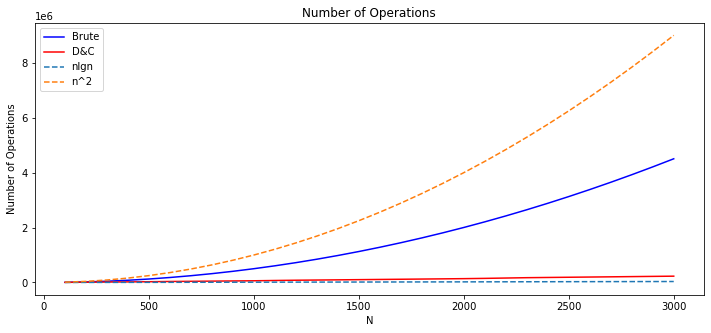

In [12]:
plt.figure(figsize=(12,5))
plt.plot(results_brute['N'], results_brute['Brute Operations'],'blue', label='Brute')
plt.plot(results_brute['N'], results_brute['D&C Operations'],'red', label= 'D&C')
plt.plot(results_brute['N'], results_brute['nlgn'],'--', label= 'nlgn')
plt.plot(results_brute['N'], results_brute['n^2'],'--', label= 'n^2')
plt.xlabel('N')
plt.ylabel('Number of Operations')
plt.title('Number of Operations')
plt.legend()
plt.savefig('../Analysis/Operations.jpg', bbox_inches='tight')

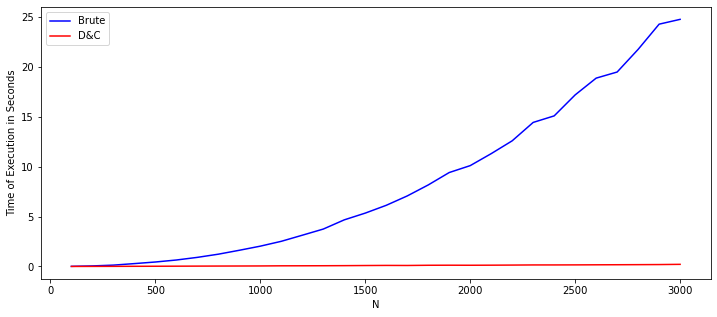

In [8]:
plt.figure(figsize=(12,5))
plt.plot(results_brute['N'], results_brute['Brute Time'],'blue', label='Brute')
plt.plot(results_brute['N'], results_brute['D&C Time'],'red', label= 'D&C')
plt.xlabel('N')
plt.ylabel('Time of Execution in Seconds')
plt.legend()
plt.savefig('../Analysis/ExecutionTime.jpg', bbox_inches='tight')

In [9]:
input_size2 = []
dc_operations2 = []
dc_time2 = []
m= 5
for n in range(10000,510000,10000):
    operations = 0
    input_size2.append(n)
    x_values = choice(arange(-n//4, n//4, 0.25), size=n, replace=False)
    y_values = choice(arange(-n//4, n//4, 0.25), size=n, replace=False)
    points = [Point(x_values[i], y_values[i]) for i in range(n)]    
    start_dc_time = time.time()
    divide_conquer_result, operations = divide_and_conquer_m_closest_pairs(points, m, 0)
    dc_time2.append(time.time() - start_dc_time)
    dc_operations2.append(operations)  
    
results = pd.DataFrame({'N':input_size2,'D&C Operations':dc_operations2,'D&C Time':dc_time2})
results['nlogn'] = results['N']*np.log2(results['N'])
results['n^2'] = results['N']*results['N']

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(results['N'], results['D&C Operations'],'red', label= 'D&C')
plt.plot(results['N'], results['nlgn'],'--', label= 'nlgn')
plt.xlabel('N')
plt.ylabel('Operations')
plt.legend()
plt.savefig('../Analysis/DCOperations.jpg', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(results['N'], results['D&C Time'],'red', label= 'D&C')
plt.xlabel('N')
plt.ylabel('Time')
plt.legend()
plt.savefig('../Analysis/DCTime.jpg', bbox_inches='tight')